<Axes: >

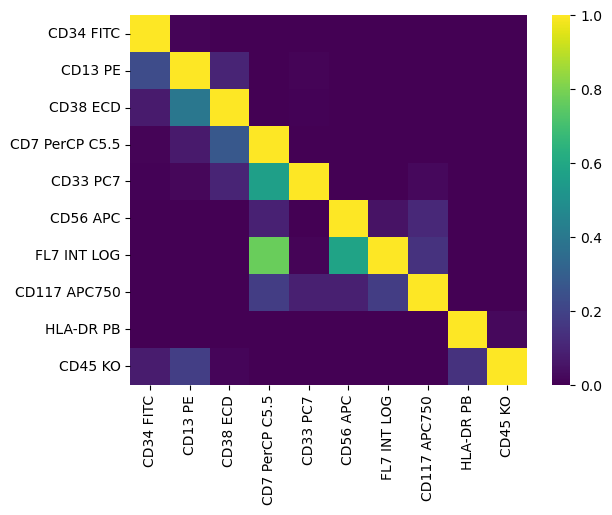

In [102]:
from bokeh.io import show, export_png
from pathlib import Path

import flowkit as fk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_sample(subject_id, data_dir):
    data_path = Path(data_dir)
    sample = fk.Sample(
        data_path / subject_id / f"{subject_id}_sample.fcs",
        sample_id=subject_id,
        null_channel_list=['TIME', 'FS TOF LIN', 'SS PEAK LIN', 'SS TOF LIN']
    )
    # Correct channel idx issues
    if sample.pnn_labels[0]=='FS PEAK':
        sample.fluoro_indices=[3,4,5,6,7,8,9,10,11,12]
        sample.scatter_indices=[1,2]
    else:
        sample.fluoro_indices=[2,3,4,5,6,7,8,9,10,11]
        sample.scatter_indices=[0,1]

    detectors = [sample.pnn_labels[i] for i in sample.fluoro_indices]
    fluorochromes = [sample.pns_labels[i] for i in sample.fluoro_indices]
    mat = pd.read_csv(
        data_path / subject_id / (subject_id + "_compensation.csv"),
        index_col=0
    )
    #mat = np.zeros_like(mat)
    #np.fill_diagonal(mat, 1)
    sample.compensation = fk.Matrix(
        mat.values,
        detectors=detectors,
        fluorochromes=fluorochromes
    )
    sample.apply_compensation(sample.compensation)
    return sample

    
sample = load_sample(
    "sub-713177765_specimen-marrow",
    #"sub-713177765_specimen-marrow",
    "debug_output"
)
#xform = fk.transforms.AsinhTransform(
#    param_t=70, param_m=10, param_a=1
#)
xform = fk.transforms.LogicleTransform(
    param_t=70,
    param_w=0.5,
    param_m=4.5,
    param_a=0
)
sample.apply_transform(xform)
sns.heatmap(
    sample.compensation.as_dataframe(fluoro_labels=True),
    cmap="viridis"
)

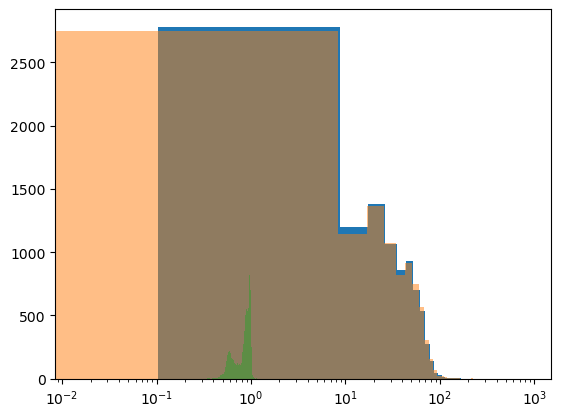

In [103]:
fluo = "CD45 KO"
raw = sample.as_dataframe(source="raw", subsample=True, col_names=sample.pns_labels).loc[:, fluo]
comp = sample.as_dataframe(source="comp", subsample=True, col_names=sample.pns_labels).loc[:, fluo]
xformed = sample.as_dataframe(source="xform", subsample=True, col_names=sample.pns_labels).loc[:, fluo]
plt.hist(raw, bins=100)
plt.hist(comp, alpha=0.5, bins=100)
plt.hist(xformed, alpha=0.5, bins=100)
plt.xscale("log")

Text(0.5, 0.9, 'sub-713177765_specimen-marrow, LogicleTransform(t: 70, w: 0.5, m: 4.5, a: 0)')

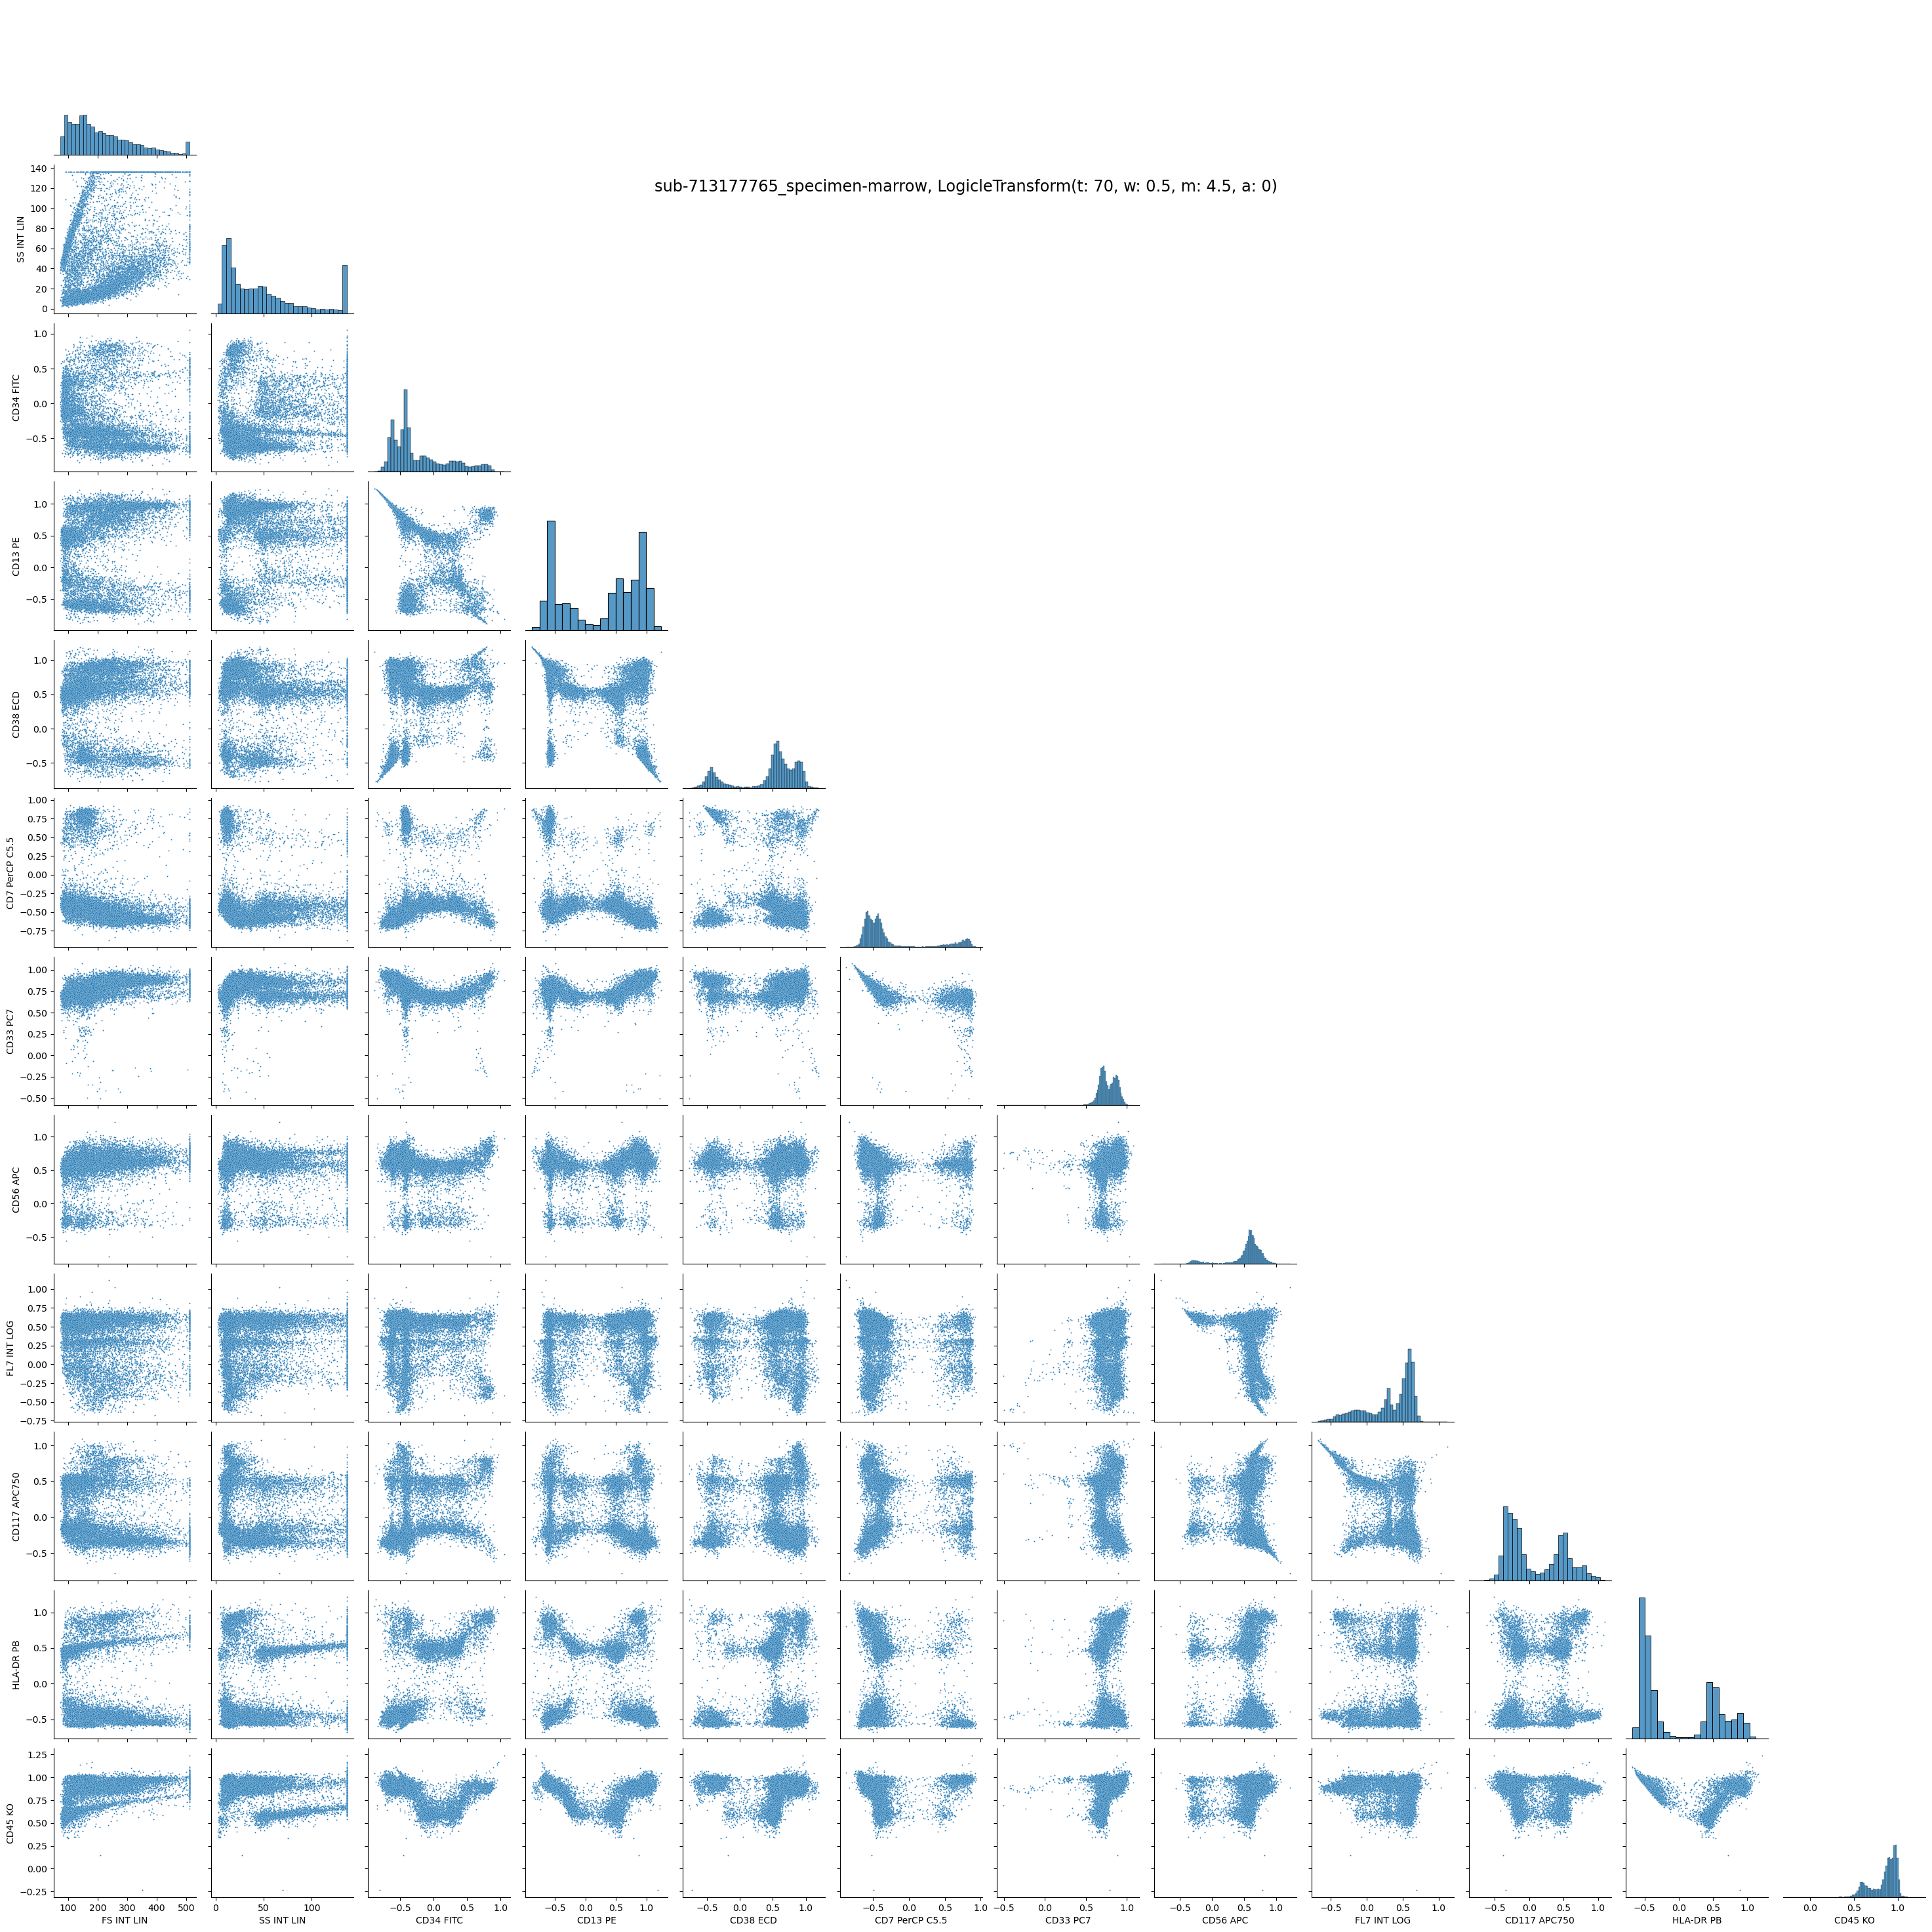

In [104]:
df = sample.as_dataframe(source="xform", col_names=sample.pns_labels, subsample=True).iloc[:, :-4]
#sns.pairplot(df, kind="hist", corner=True)
sns.pairplot(df, kind="scatter", corner=True, plot_kws=dict(s=2))
plt.suptitle(f"{sample.id}, {xform}", y=0.9, fontsize="xx-large")

In [2]:
p = sample.plot_scatter_matrix(source="xform", color_density=True)
#export_png(p, filename=f"outputs/{sample.id}.png")
show(p)

In [4]:
lmap = {
    key: value for key, value in zip(sample.pns_labels, sample.pnn_labels)
}

In [5]:
sample.pns_labels

['FS INT LIN',
 'SS INT LIN',
 'CD34 FITC',
 'CD13 PE',
 'CD38 ECD',
 'CD7 PerCP C5.5',
 'CD33 PC7',
 'CD56 APC',
 'FL7 INT LOG',
 'CD117 APC750',
 'HLA-DR PB',
 'CD45 KO',
 'TIME',
 'FS TOF LIN',
 'SS PEAK LIN',
 'SS TOF LIN']

In [6]:
p = sample.plot_scatter(lmap["CD7 PerCP C5.5"], lmap["CD33 PC7"])
show(p)
p = sample.plot_scatter(
    lmap["FL7 INT LOG"],
    lmap["CD7 PerCP C5.5"],
    source="comp"
)
show(p)

In [7]:
p = sample.plot_histogram(
    lmap["CD117 APC750"],
    source="raw"
)
show(p)

In [7]:
sample.get_metadata()

{'beginanalysis': '0',
 'begindata': '1574',
 'beginstext': '0',
 'byteord': '1,2,3,4',
 'datatype': 'F',
 'endanalysis': '0',
 'enddata': '10578149',
 'endstext': '0',
 'mode': 'L',
 'nextdata': '0',
 'par': '16',
 'tot': '165259',
 'p1b': '32',
 'p1e': '0,0',
 'p1g': '1.0',
 'p1r': '262144',
 'p1n': 'FS INT LIN',
 'p1s': 'FS INT LIN',
 'p2b': '32',
 'p2e': '0,0',
 'p2g': '1.0',
 'p2r': '262144',
 'p2n': 'SS INT LIN',
 'p2s': 'SS INT LIN',
 'p3b': '32',
 'p3e': '0,0',
 'p3g': '1.0',
 'p3r': '262144',
 'p3n': 'FL1 INT LOG',
 'p3s': 'CD34 FITC',
 'p4b': '32',
 'p4e': '0,0',
 'p4g': '1.0',
 'p4r': '262144',
 'p4n': 'FL2 INT LOG',
 'p4s': 'CD13 PE',
 'p5b': '32',
 'p5e': '0,0',
 'p5g': '1.0',
 'p5r': '262144',
 'p5n': 'FL3 INT LOG',
 'p5s': 'CD38 ECD',
 'p6b': '32',
 'p6e': '0,0',
 'p6g': '1.0',
 'p6r': '262144',
 'p6n': 'FL4 INT LOG',
 'p6s': 'CD7 PerCP C5.5',
 'p7b': '32',
 'p7e': '0,0',
 'p7g': '1.0',
 'p7r': '262144',
 'p7n': 'FL5 INT LOG',
 'p7s': 'CD33 PC7',
 'p8b': '32',
 'p8e': '0